In [21]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt # converting timestamp to date
import seaborn as sns # Visualizer for data
import matplotlib.pyplot as plt # matplot
import matplotlib.dates as mdates # for plotting dates
%matplotlib inline
from subprocess import check_output


In [22]:
# Input files i'm using
address_gr = pd.read_csv('../DataSet/archive/EthereumUniqueAddressGrowthRate.csv')
blocksize_hist = pd.read_csv('../DataSet/archive/EthereumBlockSizeHistory.csv')
etherprice_usd = pd.read_csv('../DataSet/archive/EtherPriceHistory(USD).csv')
hashrate_gr = pd.read_csv('../DataSet/archive/EthereumNetworkHashRateGrowthRate.csv')
marketcap = pd.read_csv('../DataSet/archive/EtherMarketCapChart.csv')
tx_hist = pd.read_csv('../DataSet/archive/EthereumTransactionHistory.csv')
# Going to iterate and plot everything, except those with abnormalities
things_to_plot = [(blocksize_hist,"Blocksize History"),
                  (etherprice_usd, "Etherprice - USD"),
                  (hashrate_gr,"Hashrate Growth Rate"),
                # (address_gr, "Address Growth Rate"),
                # (marketcap, "Market Capital"),
                  (tx_hist, "Transaction History")]

In [23]:
def plotit(data, title):
    # makes numpy array
    r = data.values#.view(np.recarray)
    #grab dates - convert to format
    date_df = r[:,0]
    date_df = pd.to_datetime(date_df)
    #grab values
    value_df = r[:,2]
    # make new plots
    plt.style.use('ggplot')
    fig, ax = plt.subplots(figsize=(15, 7))
    ax.set_title(title)
    ax.plot(date_df, value_df)
    ax.grid(False)
    # matplotlib date format object
    hfmt = mdates.DateFormatter('%Y -%d - %m')
    # format the ticks
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(hfmt)
    # format the coords message box
    def yvals(x):
        return '$%1.2f' % x
    ax.format_xdata = hfmt
    ax.format_ydata = yvals
    # rotates and right aligns the x labels, and moves the bottom of the
    # axes up to make room for them
    fig.autofmt_xdate()
    plt.show()

Index(['Date(UTC)', 'UnixTimeStamp', 'Supply', 'MarketCap', 'Price'], dtype='object')


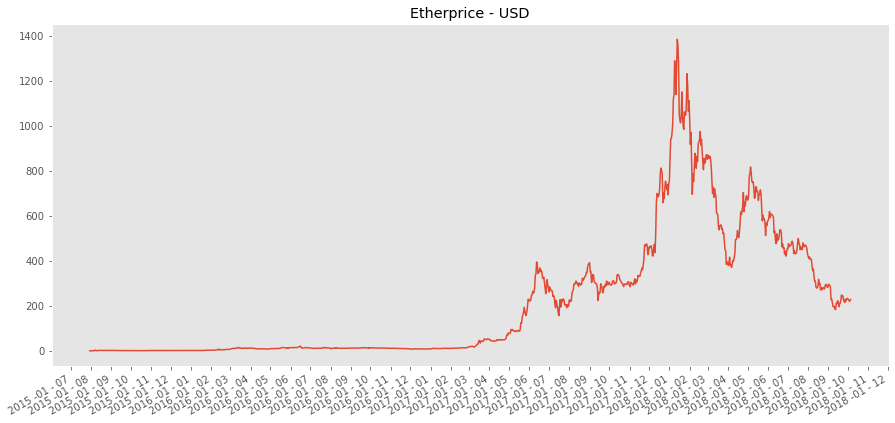

In [24]:
print(marketcap.columns)
plotit(etherprice_usd, "Etherprice - USD")